# **Data Analysis and Recommendations on Disney+ Hotstar Content - 2019 VIT Hackathon**
                      

This project was accomplished during the 2019 VIT Hackathon, conducted at Vellore, India. The topic was freedom of choice and my team had submitted an abstract on ‘Data Analysis and Recommendations on Disney+ Hotstar Content’.

Now, I want to explain why we chose this domain and the topic.

I have seen the impact of data in everyday usage tremendously increase and as an undergrad student doing computer science, I wanted to get my hands dirty on something that was replenishing and growing.

Disney+ Hotstar is one of the most common platforms that people utilize in India, more than other famous streaming platforms. (For example, People from villages were connected to Hotstar more as Hotstar had all local content relative to the different cities and states in India. Hence, almost the majority of the people were able to use it. The second reason would be that it was much more affordable than other streaming platforms).

You can find the link to this dataset at - https://www.kaggle.com/code/jeniljani/disney-hotstar-eda/input

1. Import the Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
!pip install squarify

2. Load the Dataset

In [2]:
df = pd.read_csv('/content/hotstar.csv')
df.head(5)

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1,1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
2,1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
3,1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
4,1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie


Setting the hotstar_id column as index

In [3]:
df.set_index('hotstar_id',inplace=True)
df.head(5)

,title,description,genre,year,age_rating,running_time,seasons,episodes,type
hotstar_id,,,,,,,,,
1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie


* Number of rows and columns.
* Datatype of each columns.
* Analyzing the numerial datas.



3. Perform Data Preprocessing - Understand the data

In [4]:
df.shape

(6874, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6874 entries, 1000087439 to 1260129361
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         6874 non-null   object 
 1   description   6874 non-null   object 
 2   genre         6874 non-null   object 
 3   year          6874 non-null   int64  
 4   age_rating    6874 non-null   object 
 5   running_time  4568 non-null   float64
 6   seasons       2306 non-null   float64
 7   episodes      2306 non-null   float64
 8   type          6874 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 537.0+ KB


In [6]:
df.describe()

,year,running_time,seasons,episodes
count,6874.000000,4568.000000,2306.000000,2306.000000
mean,2011.718650,98.746716,2.661752,127.366869
std,11.936894,49.411142,4.942716,258.138186
min,1928.000000,1.000000,1.000000,1.000000
25%,2009.000000,70.000000,1.000000,6.000000
50%,2016.000000,116.000000,1.000000,22.000000
75%,2019.000000,135.000000,2.000000,130.750000
max,2023.000000,229.000000,73.000000,3973.000000


* Number of null value present in each columns

In [7]:
df.isnull().sum()

title              0
description        0
genre              0
year               0
age_rating         0
running_time    2306
seasons         4568
episodes        4568
type               0
dtype: int64

<Axes: ylabel='hotstar_id'>

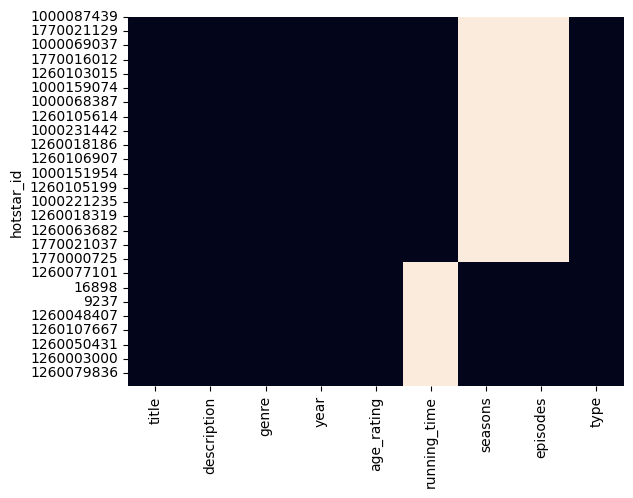

In [8]:
sns.heatmap(df.isnull(), cbar=False)

As length of the shows can be estimated by running_time column, seasons and episodes columns can be droped.

In [9]:
df.drop(columns=['seasons','episodes'], inplace=True)
df.head(3)

,title,description,genre,year,age_rating,running_time,type
hotstar_id,,,,,,,
1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,movie
1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,movie
1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,movie


Creating a dataset where running_time column is dropped

In [10]:
df1 = df.dropna(axis=0, inplace=False,how='any')
df1.isnull().sum()

title           0
description     0
genre           0
year            0
age_rating      0
running_time    0
type            0
dtype: int64

In [11]:
df.age_rating.value_counts()

U/A 13+    2980
U          1251
U/A 16+    1235
U/A 7+     1069
A           338
PG            1
Name: age_rating, dtype: int64

English, Kannada, Star Sports 1 Marathi, Hindi, Tamil, Star Sports 2, Star Vijay, Star Sports Kannada 1, Star Suvarna, Marathi, Star Sports 1 Telugu, Telugu and Star Sports Hindi 1 are not age_rating of shows. So, these instances can be dropped.


In [12]:
dropped_age_rating = ['English', 'Kannada', 'Star Sports 1 Marathi', 'Hindi', 'Tamil', 'Star Sports 2', 'Star Vijay', 'Star Sports Kannada 1', 'Star Suvarna', 'Marathi', 'Star Sports 1 Telugu', 'Telugu', 'Star Sports Hindi 1']
df = df[df['age_rating'].isin(dropped_age_rating) == False ]
df.age_rating.value_counts()

U/A 13+    2980
U          1251
U/A 16+    1235
U/A 7+     1069
A           338
PG            1
Name: age_rating, dtype: int64

In [13]:
df['age_rating'] = df.age_rating.str.replace('U/A 13+','13')
df['age_rating'] = df.age_rating.str.replace('U/A 7+','7')
df['age_rating'] = df.age_rating.str.replace('U/A 16+','16')


<ipython-input-13-660a07b00c02>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['age_rating'] = df.age_rating.str.replace('U/A 13+','13')
<ipython-input-13-660a07b00c02>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['age_rating'] = df.age_rating.str.replace('U/A 7+','7')
<ipython-input-13-660a07b00c02>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['age_rating'] = df.age_rating.str.replace('U/A 16+','16')


In [14]:
df.age_rating.value_counts()

13+    2980
U      1251
16+    1235
7+     1069
A       338
PG        1
Name: age_rating, dtype: int64

In [15]:
df.genre.value_counts()

Drama               2043
Comedy               791
Romance              642
Action               619
Reality              401
Thriller             352
Family               263
Animation            240
Documentary          207
Sport                180
Animals & Nature     119
Horror               118
Kids                 104
Crime                 99
Mythology             81
Talk Show             73
Superhero             63
Standup Comedy        51
Adventure             49
Biopic                47
Mystery               42
Historical            42
Science Fiction       41
Science               34
Teen                  31
Awards                28
Lifestyle             24
Food                  20
Concert Film          18
Musical               16
Fantasy               11
Shorts                10
Travel                 7
Docudrama              5
Formula E              1
Football               1
Kabaddi                1
Name: genre, dtype: int64

In [16]:
df.type.value_counts()

movie    4568
tv       2306
Name: type, dtype: int64

In [17]:

df.year.value_counts()

2022    609
2021    561
2017    513
2019    498
2018    449
       ... 
1960      1
1958      1
1937      1
1951      1
1942      1
Name: year, Length: 78, dtype: int64

In [18]:
'Movies are from year {} to {}'.format(np.min(df.year),np.max(df.year))

'Movies are from year 1928 to 2023'

<Axes: title={'center': 'Number of shows increases per year'}, xlabel='Year', ylabel='Count'>

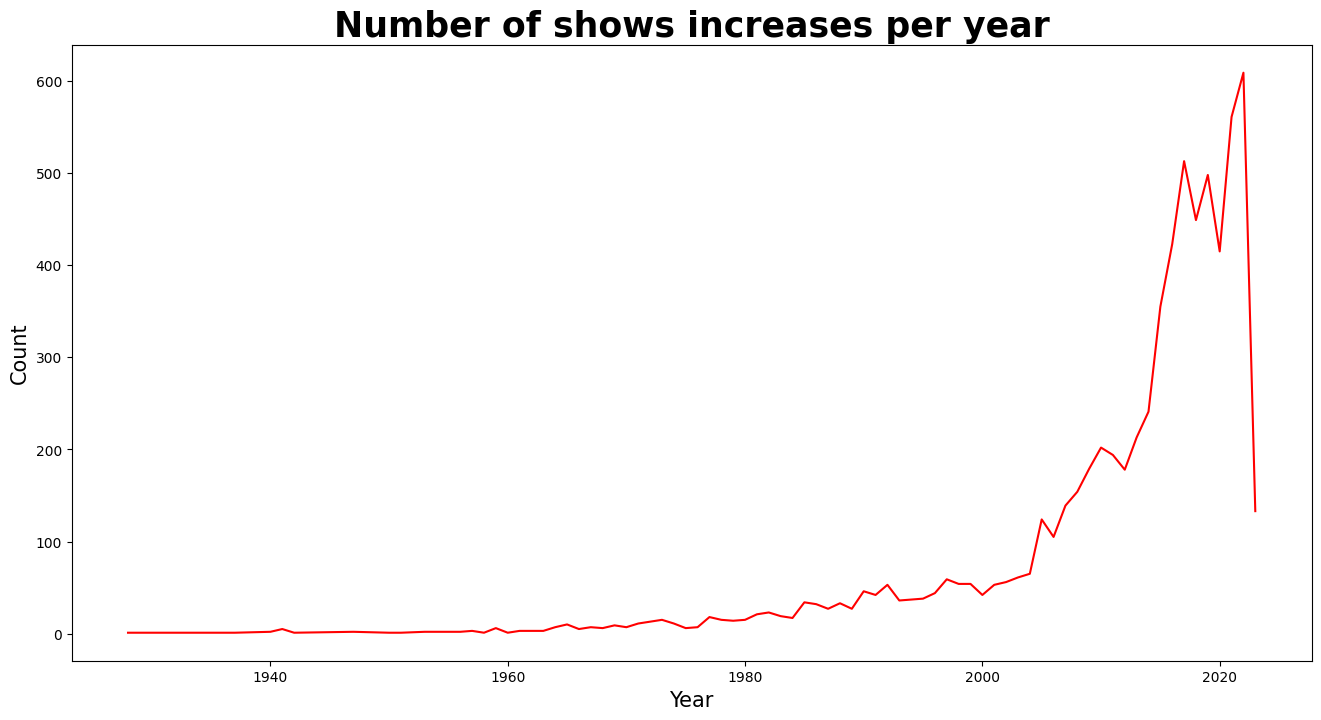

In [19]:
plt.figure(figsize=(16,8))
plt.title('Number of shows increases per year',fontdict={'fontsize':25},fontweight="bold")
data=df.year.value_counts().sort_values(ascending=False)
plt.xlabel('Year',fontdict={'fontsize':15})
plt.ylabel('Count',fontdict={'fontsize':15})
sns.lineplot(x=data.index, y=data, color='r')

**Number of Movies/TV shows in hotstar from year 2006**

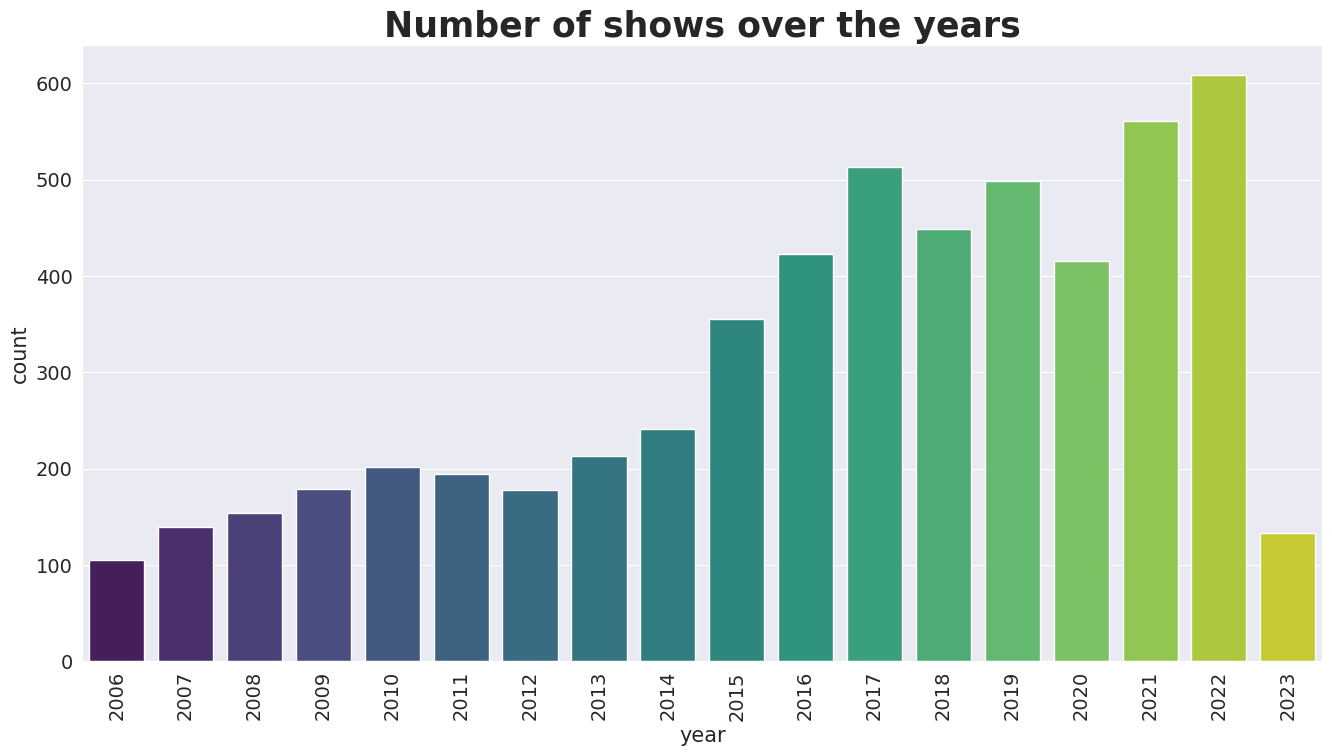

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the 'year' column
plt.figure(figsize=(16, 8))
plt.rcParams['font.size'] = 14
sns.set_style('darkgrid')
plt.title('Number of shows over the years', fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Movie/TV shows', fontsize=15)
plt.xticks(rotation=90)

# Filter the data for years greater than 2005 and create the countplot
sns.countplot(data=df[df['year'] > 2005], x='year', palette='viridis')

plt.show()

**Top genres in the dataset**

In [22]:
df.genre.value_counts()[:10]

Drama          2043
Comedy          791
Romance         642
Action          619
Reality         401
Thriller        352
Family          263
Animation       240
Documentary     207
Sport           180
Name: genre, dtype: int64

Text(0, 0.5, 'Count')

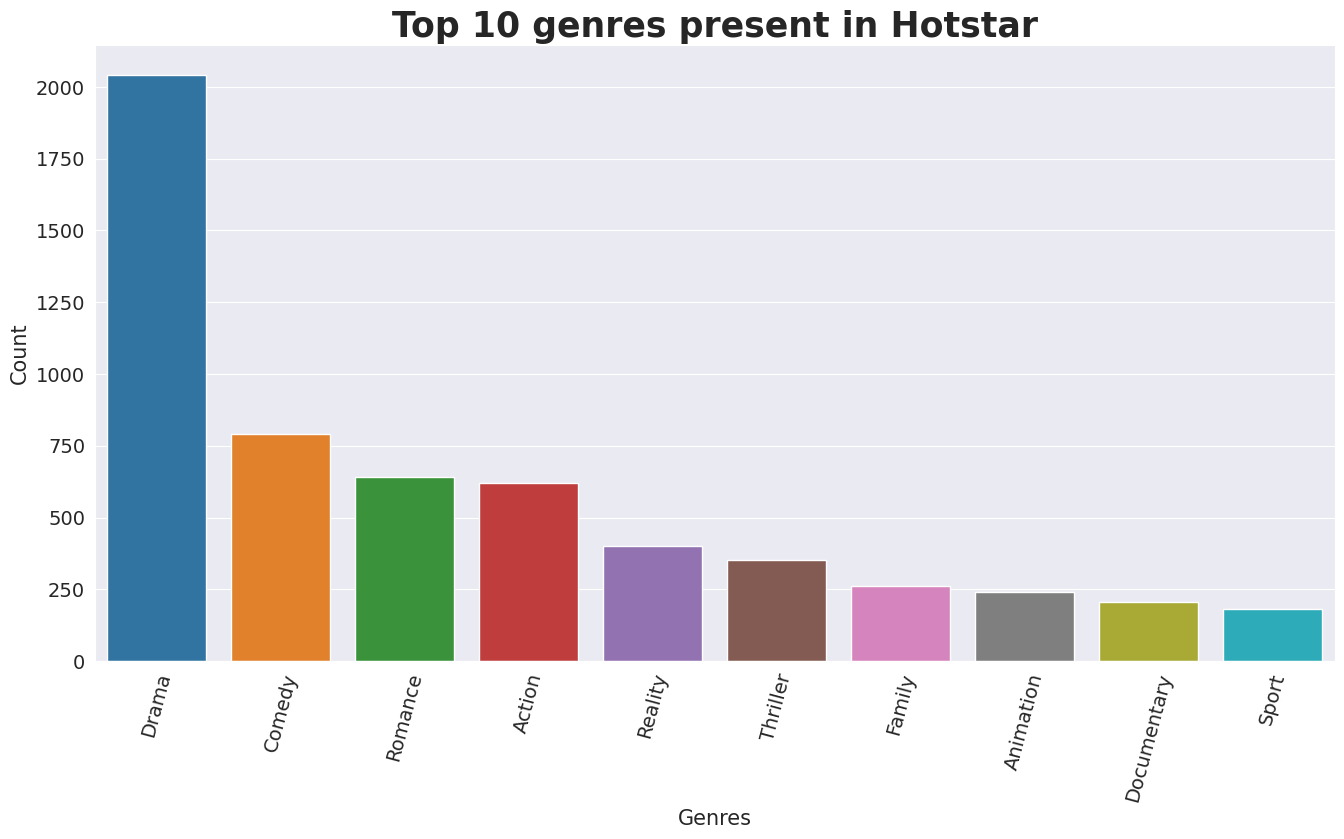

In [23]:
data= df.genre.value_counts()[:10]
plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 14
sns.set_style('darkgrid')
plt.title('Top 10 genres present in Hotstar',fontdict={'fontsize':25},fontweight="bold")
plt.xlabel('Genres',fontdict={'fontsize':15})
plt.xticks(rotation=75)
sns.barplot(x=data.index,y=data)
plt.ylabel('Count',fontdict={'fontsize':15})


**Distribution of Running Time**

In [24]:
'Runnig time is distributed in between {} to {} minutes'.format(np.min(df.running_time),np.max(df.running_time))

'Runnig time is distributed in between 1.0 to 229.0 minutes'

All the null values present in running_time are removed earlier

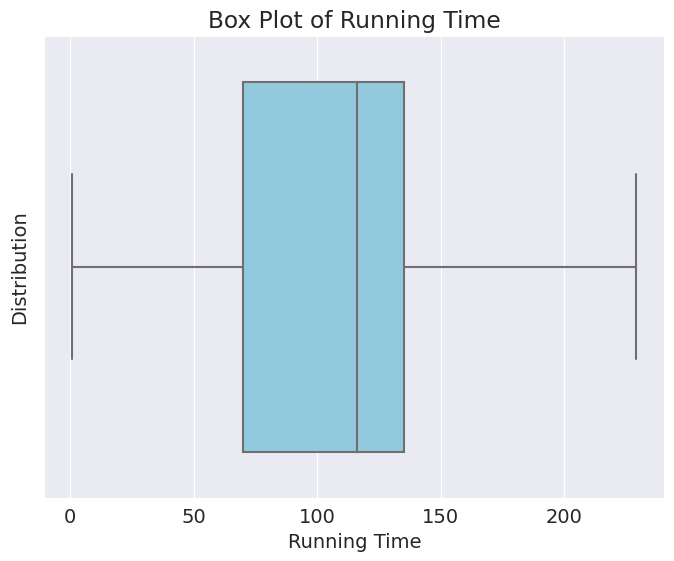

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a 'running_time' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='running_time', data=df, color='skyblue')

plt.title('Box Plot of Running Time')
plt.xlabel('Running Time')
plt.ylabel('Distribution')
plt.show()


Outliers are present in runnig_time column that should be removed

In [31]:
#calculating the interquartile range
Q1 = df.running_time.quantile(.25)
Q3 = df.running_time.quantile(.75)
iqr = Q3 - Q1
iqr

65.0

All the outliers are removed

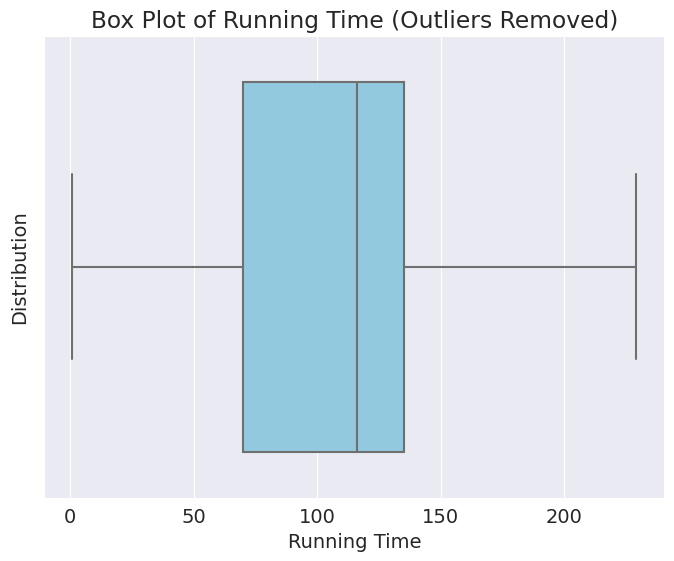

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a 'running_time' column

# Calculate the IQR
Q1 = df['running_time'].quantile(0.25)
Q3 = df['running_time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
filtered_df = df[(df['running_time'] >= lower_bound) & (df['running_time'] <= upper_bound)]

# Create a boxplot of the filtered data
plt.figure(figsize=(8, 6))
sns.boxplot(x='running_time', data=filtered_df, color='skyblue')

plt.title('Box Plot of Running Time (Outliers Removed)')
plt.xlabel('Running Time')
plt.ylabel('Distribution')
plt.show()


<Figure size 1600x800 with 0 Axes>

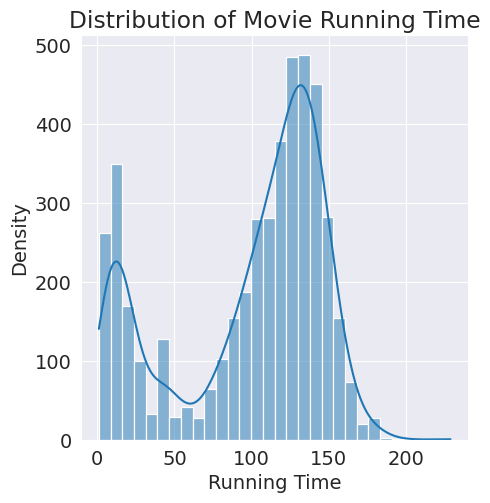

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'd' is your DataFrame with a 'running_time' column

plt.figure(figsize=(16, 8))

# Use displot to create a distribution plot
sns.displot(data=df, x='running_time', kde=True)

# Set the title and labels
plt.title('Distribution of Movie Running Time')
plt.xlabel('Running Time')
plt.ylabel('Density')

plt.show()


**Different age_rating present in dataset**

Text(0, 0.5, 'Count')

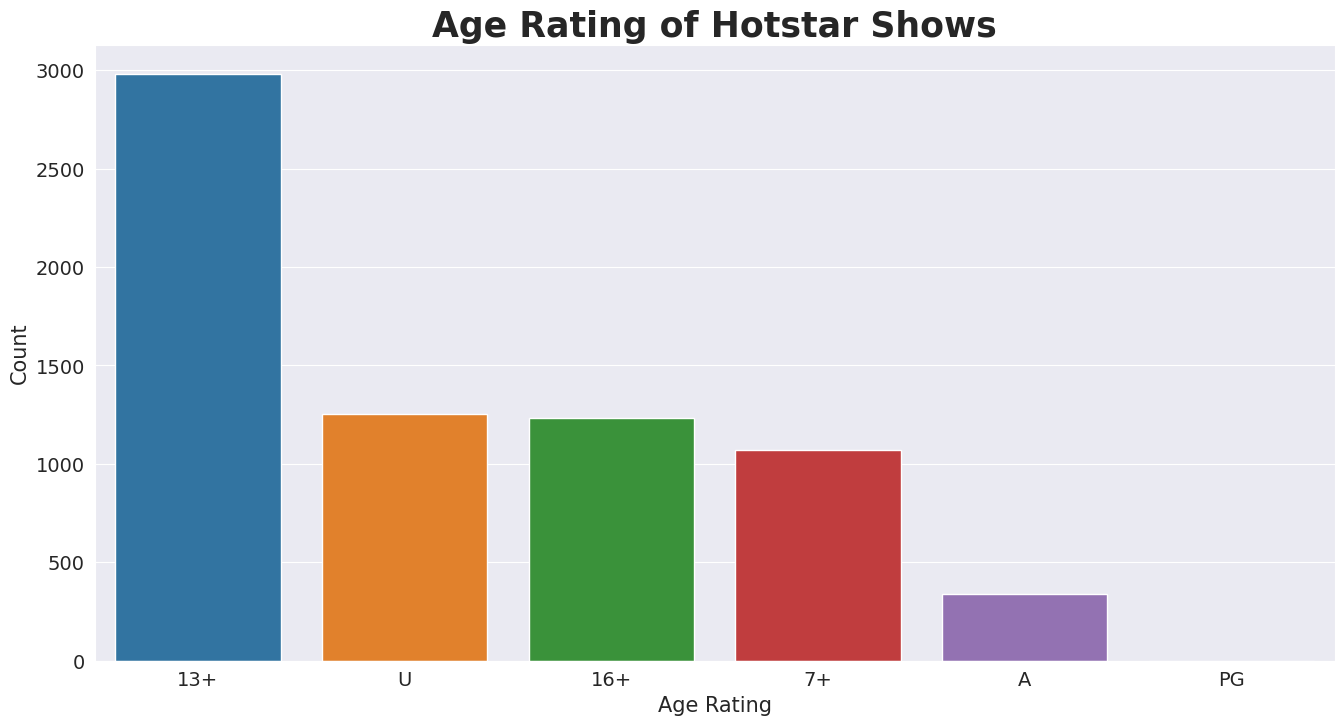

In [38]:
data= df.age_rating.value_counts()
plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 14
sns.set_style('darkgrid')
plt.title('Age Rating of Hotstar Shows',fontdict={'fontsize':25},fontweight="bold")
plt.xlabel('Age Rating',fontdict={'fontsize':15})
plt.xticks(rotation=0)
sns.barplot(x=data.index,y=data)
plt.ylabel('Count',fontdict={'fontsize':15})


Text(0.5, 1.0, 'Age Rating of Hotstar Shows')

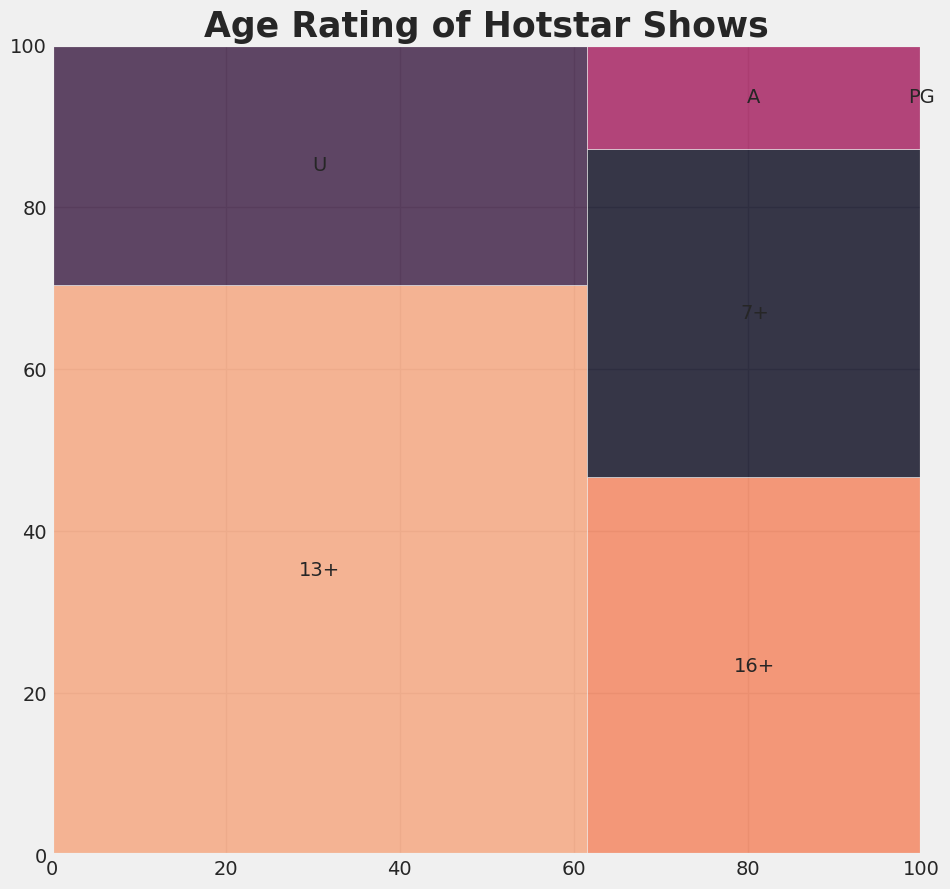

In [41]:
import squarify
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(10,10))
squarify.plot(data,label=data.index,alpha=0.8)
plt.title('Age Rating of Hotstar Shows',fontdict={'fontsize':25},fontweight="bold")

**Types of Shows in Hotstar**

Text(0.5, 1.0, 'TV Series/Movies % in Hotstar')

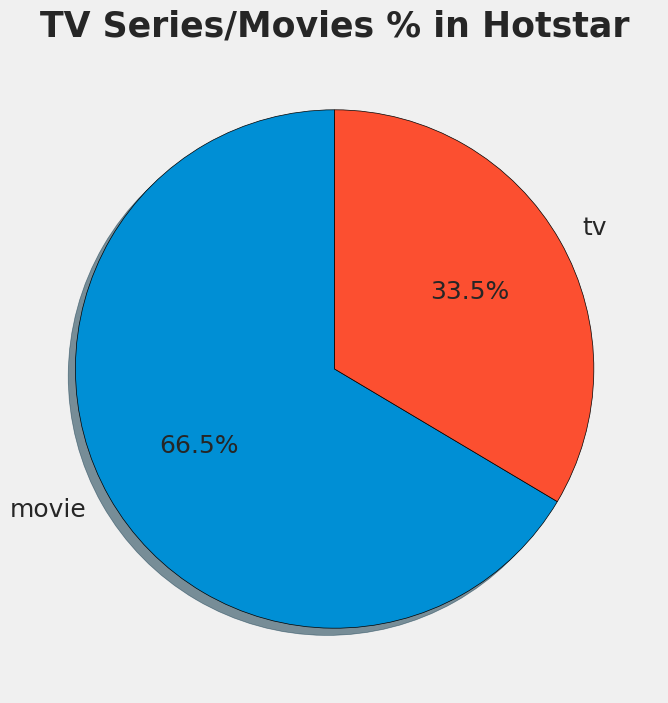

In [44]:
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 18
data = df.type.value_counts()
plt.pie(data,labels=data.index,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('TV Series/Movies % in Hotstar',fontdict={'fontsize':25},fontweight="bold")

**Words that are mostly used in describtion**

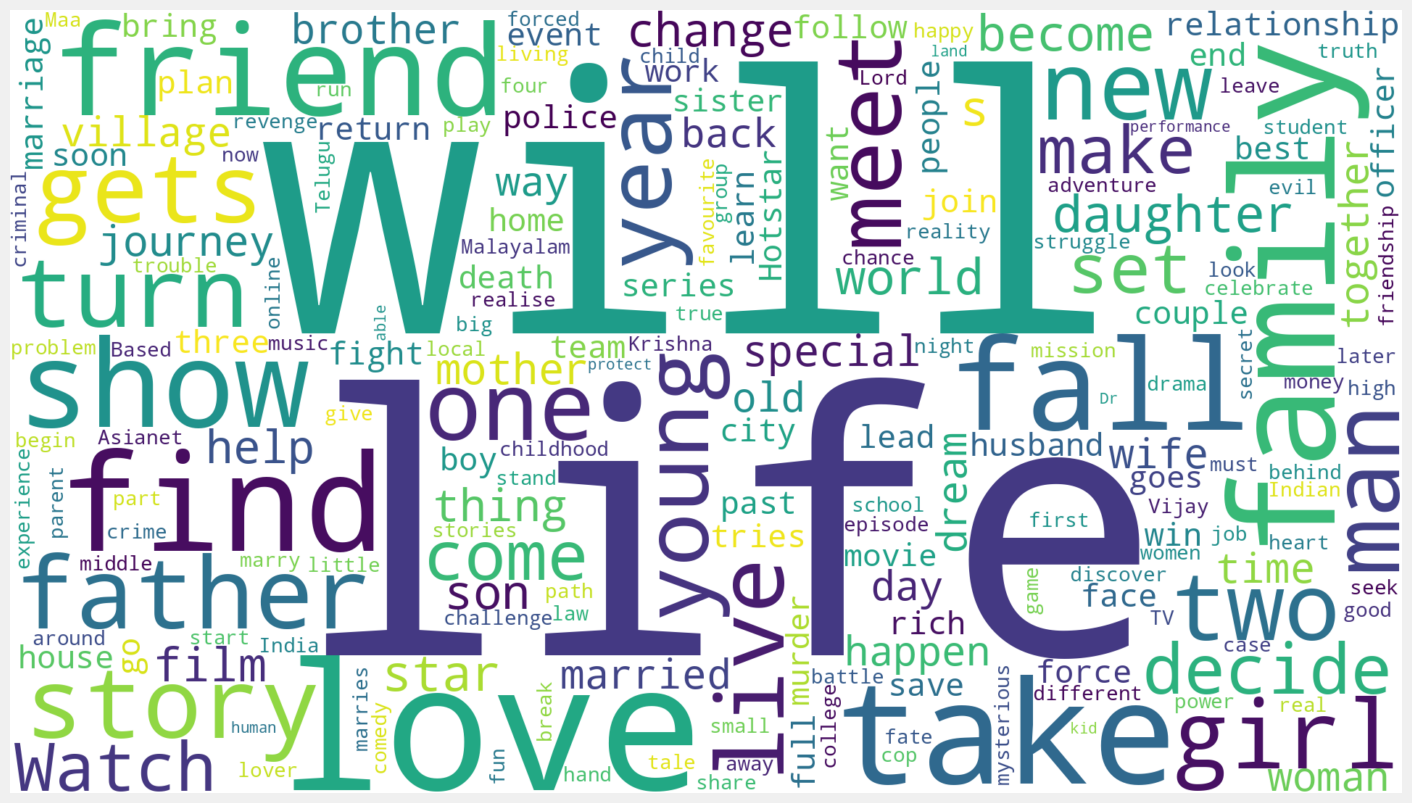

In [43]:
from wordcloud import WordCloud
image1 = " ".join(i for i in df['description'])
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(image1)
word_cloud1.to_file('ima1.png')
plt.figure(figsize=(16,16))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

'Love' and 'Life' are the words that are mostly used in the describtion of hotstar shows as there are high numbers of Drama and Comedy movies present in hotstar.